<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/linear_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/delivery_time.csv')

In [4]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

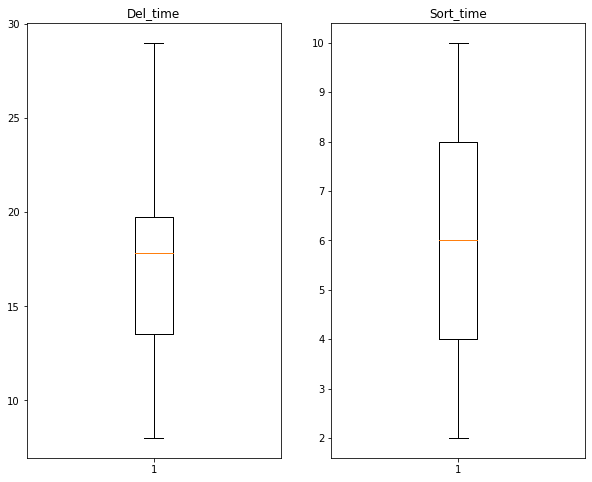

In [7]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Del_time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sort_time')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


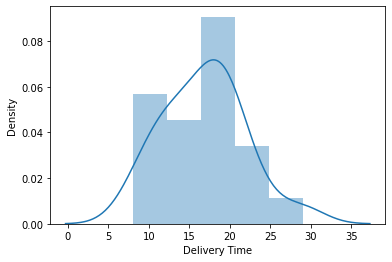

In [8]:
sns.distplot(df['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


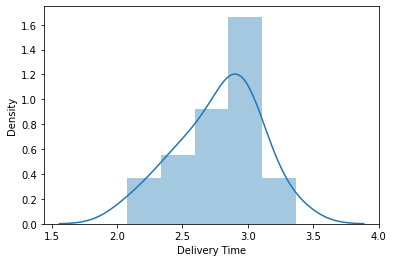

In [9]:
a = sns.distplot(np.log(df['Delivery Time']))

In [10]:
dflog = np.log(df['Delivery Time'])

In [11]:
dflog.skew()

-0.4512901148522999

In [12]:
df.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


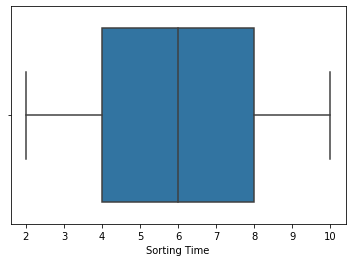

In [13]:
sns.boxplot(df['Sorting Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


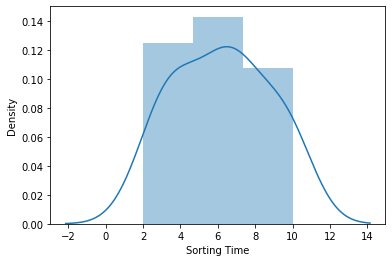

In [14]:
sns.distplot(df['Sorting Time'])

Transformations are not required since the dataset is approximately normally distributed.

In [15]:
import statsmodels.api as sa

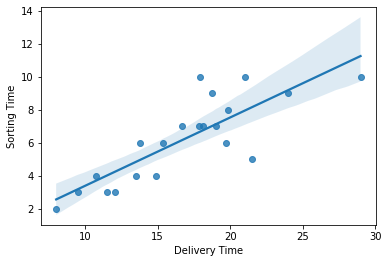

In [16]:
sns.regplot(x='Delivery Time', y= 'Sorting Time', data=df)

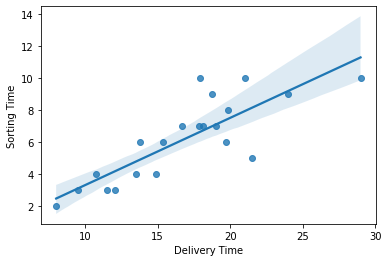

In [17]:
sns.regplot(x='Delivery Time', y= 'Sorting Time', data=df, robust = True)

In [18]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


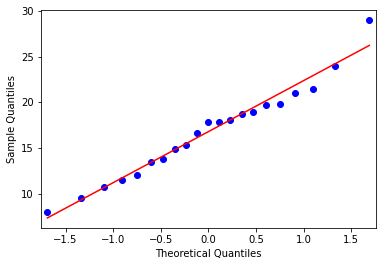

In [19]:
sa.qqplot(df['Delivery Time'], line = 'r');

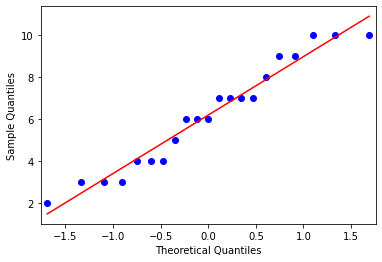

In [20]:
sa.qqplot(df['Sorting Time'], line = 'r');

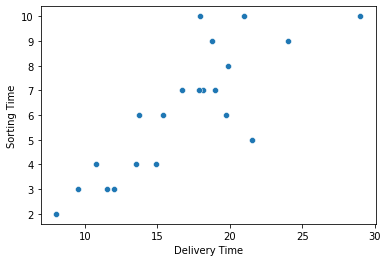

In [21]:
sns.scatterplot(x='Delivery Time', y='Sorting Time', data=df)

In [28]:
df1 = df

In [29]:
df1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [33]:
df1.rename({'Delivery Time': 'delivery_time', 'Sorting Time': 'sorting_time'}, axis=1,inplace=True)

In [34]:
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [35]:
model = smf.ols('delivery_time~sorting_time', data=df1).fit()

In [36]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        08:15:22   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model.tvalues


Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [39]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [40]:
alpha = 0.05

In [41]:
if model.pvalues[0]>alpha:
  print('We fail to reject Null hypothesis')
else:
  print('We uphold alternative hypothesis')

We uphold alternative hypothesis


In [42]:
if model.pvalues[1]>alpha:
  print('We fail to reject Null hypothesis')
else:
  print('We uphold alternative hypothesis')

We uphold alternative hypothesis


In [43]:
y_pred = model.predict(df1['sorting_time'])

In [44]:
y_pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
rmse = np.sqrt(mean_squared_error(df1['delivery_time'], y_pred))

In [47]:
rmse

2.7916503270617654

In [48]:
resid = model.resid

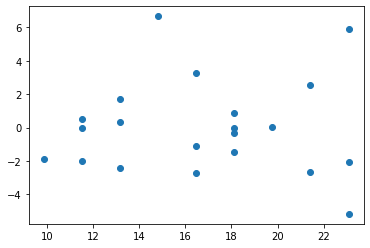

In [49]:
plt.scatter(y_pred, model.resid)

In [53]:
df2 = pd.DataFrame(y_pred, columns = ['Ypred'])

In [54]:
df2

,Ypred
0,23.072933
1,13.178814
2,16.476853
3,21.423913
4,23.072933
5,16.476853
6,18.125873
7,11.529794
8,23.072933
9,21.423913


In [55]:
df2['Residuals'] = resid

In [56]:
df2

,Ypred,Residuals
0,23.072933,-2.072933
1,13.178814,0.321186
2,16.476853,3.273147
3,21.423913,2.576087
4,23.072933,5.927067
5,16.476853,-1.126853
6,18.125873,0.874127
7,11.529794,-2.029794
8,23.072933,-5.172933
9,21.423913,-2.673913


In [57]:
df2.corr()

,Ypred,Residuals
Ypred,1.000000e+00,-4.814506e-16
Residuals,-4.814506e-16,1.000000e+00


Homoscedasticity test is passed. 
Let us test the new data


In [58]:
new_df = {'sorting_time': [2,3,4,5,6,12,3,12.4,5,7.8]}

In [59]:
new_df = pd.DataFrame(new_df)

In [61]:
new_pred = model.predict(new_df)

In [64]:
new_df['del_time_pred'] = new_pred

In [67]:
new_df.drop('new_predictions', axis=1, inplace=True)

In [68]:
new_df

,sorting_time,del_time_pred
0,2.0,9.880774
1,3.0,11.529794
2,4.0,13.178814
3,5.0,14.827833
4,6.0,16.476853
5,12.0,26.370973
6,3.0,11.529794
7,12.4,27.030581
8,5.0,14.827833
9,7.8,19.445089


In [69]:
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [70]:
df1['pred_del_time'] = y_pred

In [71]:
df1

,delivery_time,sorting_time,pred_del_time
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913
